<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [5]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.029338  74.949478  47.143298  0.005664  216.127779   
      1.0    95.863652  71.246326  69.497575  0.030302  246.637855   
      2.0    75.335168  86.155727  91.055340  0.026723  262.572958   
      3.0    97.935788  88.626073  39.891989 -0.000511  236.453338   
      4.0    37.297650  59.714356  53.601055  0.051422  160.664482   
...                ...        ...        ...       ...         ...   
999.0 25.0   99.000953  74.545787  34.958172 -0.017618  218.487294   
      26.0   83.943710  52.324950  69.290183 -0.039866  215.518977   
      27.0   33.335976  47.700495  57.723261 -0.017614  148.742118   
      28.0   72.607876  50.118847  72.985517 -0.045581  205.666659   
      29.0   31.699863  50.565626  50.770725  0.074960  143.111173   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.131526 -0.003748  
      1.0    246.617998  0.019857  
      2.0    262.544549  0.028409  
      3.0    236.459209 -0.005870  
      4.0    160.623067  0.041416  
...                 ...       ...  
999.0 25.0   218.496301 -0.009007  
      26.0   215.549746 -0.030770  
      27.0   148.779066 -0.036948  
      28.0   205.706294 -0.039635  
      29.0   143.058487  0.052686  

[30000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.029338  74.949478  47.143298  0.005664  216.127779   
      1.0    95.863652  71.246326  69.497575  0.030302  246.637855   
      2.0    75.335168  86.155727  91.055340  0.026723  262.572958   
      3.0    97.935788  88.626073  39.891989 -0.000511  236.453338   
      4.0    37.297650  59.714356  53.601055  0.051422  160.664482   
...                ...        ...        ...       ...         ...   
999.0 25.0   99.000953  74.545787  34.958172 -0.017618  218.487294   
      26.0   83.943710  52.324950  69.290183 -0.039866  215.518977   
      27.0   33.335976  47.700495  57.723261 -0.017614  148.742118   
      28.0   72.607876  50.118847  72.985517 -0.045581  205.666659   
      29.0   31.699863  50.565626  50.770725  0.074960  143.111173   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.131526 -0.003748  
      1.0    246.617998  0.019857  
      2.0    262.544549  0.028409  
      3.0    236.459209 -0.005870  
      4.0    160.623067  0.041416  
...                 ...       ...  
999.0 25.0   218.496301 -0.009007  
      26.0   215.549746 -0.030770  
      27.0   148.779066 -0.036948  
      28.0   205.706294 -0.039635  
      29.0   143.058487  0.052686  

[30000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.029338,74.949478,47.143298,0.005664,216.127779,216.131526,-0.003748
1,0.0,1.0,95.863652,71.246326,69.497575,0.030302,246.637855,246.617998,0.019857
2,0.0,2.0,75.335168,86.155727,91.055340,0.026723,262.572958,262.544549,0.028409
3,0.0,3.0,97.935788,88.626073,39.891989,-0.000511,236.453338,236.459209,-0.005870
4,0.0,4.0,37.297650,59.714356,53.601055,0.051422,160.664482,160.623067,0.041416
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,99.000953,74.545787,34.958172,-0.017618,218.487294,218.496301,-0.009007
29996,999.0,26.0,83.943710,52.324950,69.290183,-0.039866,215.518977,215.549746,-0.030770
29997,999.0,27.0,33.335976,47.700495,57.723261,-0.017614,148.742118,148.779066,-0.036948
29998,999.0,28.0,72.607876,50.118847,72.985517,-0.045581,205.666659,205.706294,-0.039635


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.029338  74.949478  47.143298  0.005664  216.127779   
      1.0    95.863652  71.246326  69.497575  0.030302  246.637855   
      2.0    75.335168  86.155727  91.055340  0.026723  262.572958   
      3.0    97.935788  88.626073  39.891989 -0.000511  236.453338   
      4.0    37.297650  59.714356  53.601055  0.051422  160.664482   
...                ...        ...        ...       ...         ...   
999.0 25.0   99.000953  74.545787  34.958172 -0.017618  218.487294   
      26.0   83.943710  52.324950  69.290183 -0.039866  215.518977   
      27.0   33.335976  47.700495  57.723261 -0.017614  148.742118   
      28.0   72.607876  50.118847  72.985517 -0.045581  205.666659   
      29.0   31.699863  50.565626  50.770725  0.074960  143.111173   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.131526 -0.003748  
      1.0    246.617998  0.019857  
      2.0    262.544549  0.028409  
      3.0    236.459209 -0.005870  
      4.0    160.623067  0.041416  
...                 ...       ...  
999.0 25.0   218.496301 -0.009007  
      26.0   215.549746 -0.030770  
      27.0   148.779066 -0.036948  
      28.0   205.706294 -0.039635  
      29.0   143.058487  0.052686  

[30000 rows x 7 columns]

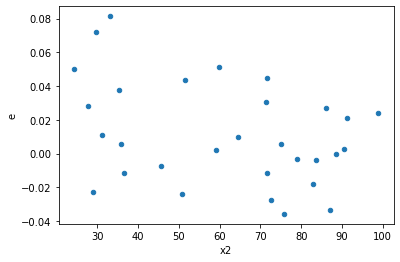

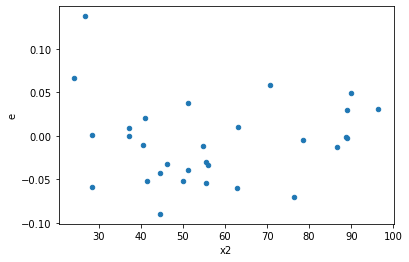

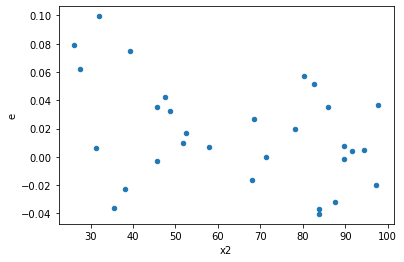

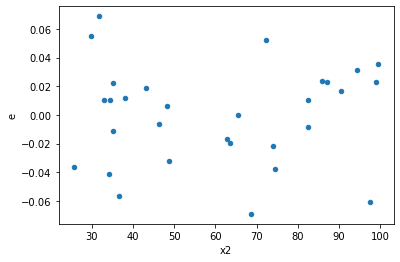

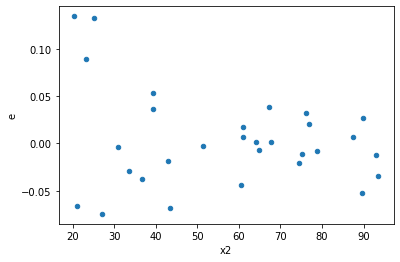

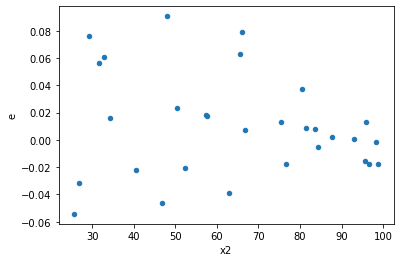

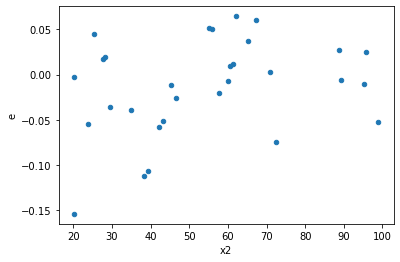

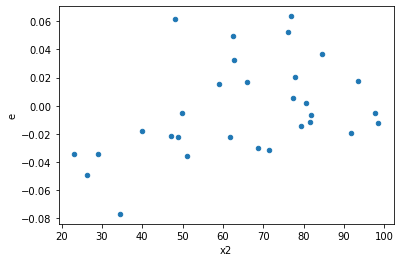

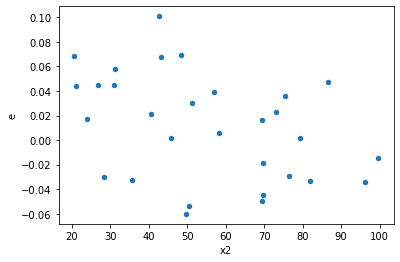

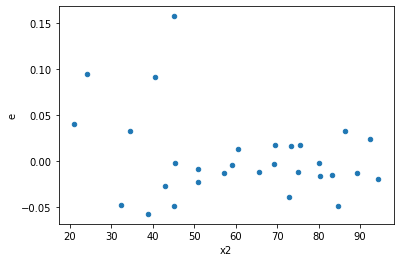

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,9.0,0.010153170217039867,0.022812288258210557,0.0011281300241155407,0.0025346986953567285,2.246814322084854,0.24362778661435902,0.8781861066928205,0.12181389330717951,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.00788103431596491,0.011815399456882161,0.0008756704795516568,0.0013128221618757957,1.4992193896361112,0.5559498366460223,0.7220250816769889,0.27797491832301113,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.013086000838670094,0.020035861778067116,0.001454000093185566,0.0022262068642296797,1.5310912802985366,0.5357562117992016,0.7321218941003992,0.2678781058996008,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.019638988834628515,0.02994683254235227,0.0021821098705142794,0.0033274258380391413,1.5248663153954451,0.5396363731957825,0.7301818134021087,0.26981818659789125,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.006055967191895044,0.008090759976036133,0.0006728852435438937,0.0008989733306706814,1.33599798672363,0.673080578621744,0.663459710689128,0.336540289310872,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.0114435463089497,0.017068431546699885,0.0012715051454388554,0.001896492394077765,1.4915334010883594,0.5609428829315459,0.719528558534227,0.28047144146577296,Reject001=1 : Homoscedasticity
9.0,9.0,9.0,0.01570155377677149,0.022016642616506578,0.0017446170863079434,0.0024462936240562862,1.402195154028481,0.6226751541438644,0.6886624229280678,0.3113375770719322,Reject001=1 : Homoscedasticity
18.0,9.0,9.0,0.005396117809905866,0.01688934524040352,0.0005995686455450962,0.001876593915600391,3.1299066913252123,0.10441598364820837,0.9477920081758958,0.05220799182410418,Reject001=1 : Homoscedasticity
25.0,9.0,9.0,0.006396921444072222,0.006801805935721668,0.000710769049341358,0.0007557562150801853,1.0632936476067931,0.9286581422171118,0.5356709288914441,0.4643290711085559,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.010928462377771347,0.005699358868758588,0.0012142735975301496,0.000633262096528732,0.5215151657886629,0.34625796841391804,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.010153170217039867,0.022812288258210557,0.0011281300241155407,0.0025346986953567285,2.246814322084854,0.24362778661435902,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.015591110346263504,0.007842854591139146,0.0017323455940292782,0.0008714282879043496,0.5030337427519221,0.32064098359672344,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.00788103431596491,0.011815399456882161,0.0008756704795516568,0.0013128221618757957,1.4992193896361112,0.5559498366460223,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.013086000838670094,0.020035861778067116,0.001454000093185566,0.0022262068642296797,1.5310912802985366,0.5357562117992016,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.013887345125691399,0.0038047435447073393,0.0015430383472990444,0.0004227492827452599,0.2739719874656687,0.06719824329465172,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.019638988834628515,0.02994683254235227,0.0021821098705142794,0.0033274258380391413,1.5248663153954451,0.5396363731957825,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.006055967191895044,0.008090759976036133,0.0006728852435438937,0.0008989733306706814,1.33599798672363,0.673080578621744,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.0114435463089497,0.017068431546699885,0.0012715051454388554,0.001896492394077765,1.4915334010883594,0.5609428829315459,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      881
Reject001=0 : Heteroscedasticity    119
Name: Result_test, dtype: int64